In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed = 123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)
#because it shows no of batches

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch)
    print(label_batch.numpy())

tf.Tensor(
[[[[142. 116. 117.]
   [137. 111. 112.]
   [107.  81.  82.]
   ...
   [173. 155. 151.]
   [182. 164. 160.]
   [196. 178. 174.]]

  [[138. 112. 113.]
   [137. 111. 112.]
   [132. 106. 107.]
   ...
   [175. 157. 153.]
   [177. 159. 155.]
   [185. 167. 163.]]

  [[117.  91.  92.]
   [112.  86.  87.]
   [144. 118. 119.]
   ...
   [176. 158. 154.]
   [176. 158. 154.]
   [181. 163. 159.]]

  ...

  [[107.  81.  80.]
   [146. 120. 119.]
   [126. 100.  99.]
   ...
   [163. 143. 142.]
   [167. 147. 146.]
   [171. 151. 150.]]

  [[115.  89.  88.]
   [124.  98.  97.]
   [160. 134. 133.]
   ...
   [161. 141. 140.]
   [165. 145. 144.]
   [169. 149. 148.]]

  [[116.  90.  89.]
   [136. 110. 109.]
   [137. 111. 110.]
   ...
   [158. 138. 137.]
   [161. 141. 140.]
   [164. 144. 143.]]]


 [[[169. 155. 154.]
   [138. 124. 123.]
   [163. 149. 148.]
   ...
   [136. 110. 109.]
   [142. 116. 115.]
   [128. 102. 101.]]

  [[167. 153. 152.]
   [152. 138. 137.]
   [148. 134. 133.]
   ...
   [106.  

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 2 0 0 0 0 1 1 0]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[162. 166. 177.]
  [166. 170. 181.]
  [177. 181. 192.]
  ...
  [165. 163. 176.]
  [160. 158. 171.]
  [162. 160. 173.]]

 [[207. 211. 222.]
  [175. 179. 190.]
  [141. 145. 156.]
  ...
  [157. 155. 168.]
  [153. 151. 164.]
  [156. 154. 167.]]

 [[186. 190. 201.]
  [182. 186. 197.]
  [195. 199. 210.]
  ...
  [157. 155. 168.]
  [153. 151. 164.]
  [154. 152. 165.]]

 ...

 [[155. 153. 166.]
  [153. 151. 164.]
  [157. 155. 168.]
  ...
  [142. 139. 150.]
  [142. 139. 150.]
  [127. 124. 135.]]

 [[185. 183. 196.]
  [173. 171. 184.]
  [162. 160. 173.]
  ...
  [148. 145. 156.]
  [130. 127. 138.]
  [128. 125. 136.]]

 [[176. 174. 187.]
  [175. 173. 186.]
  [175. 173. 186.]
  ...
  [111. 108. 119.]
  [143. 140. 151.]
  [139. 136. 147.]]]


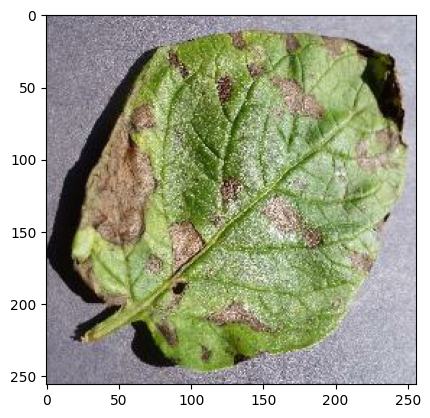

In [10]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

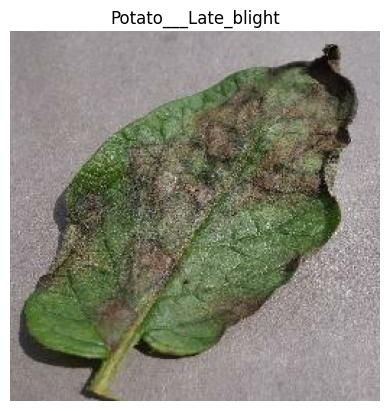

In [11]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

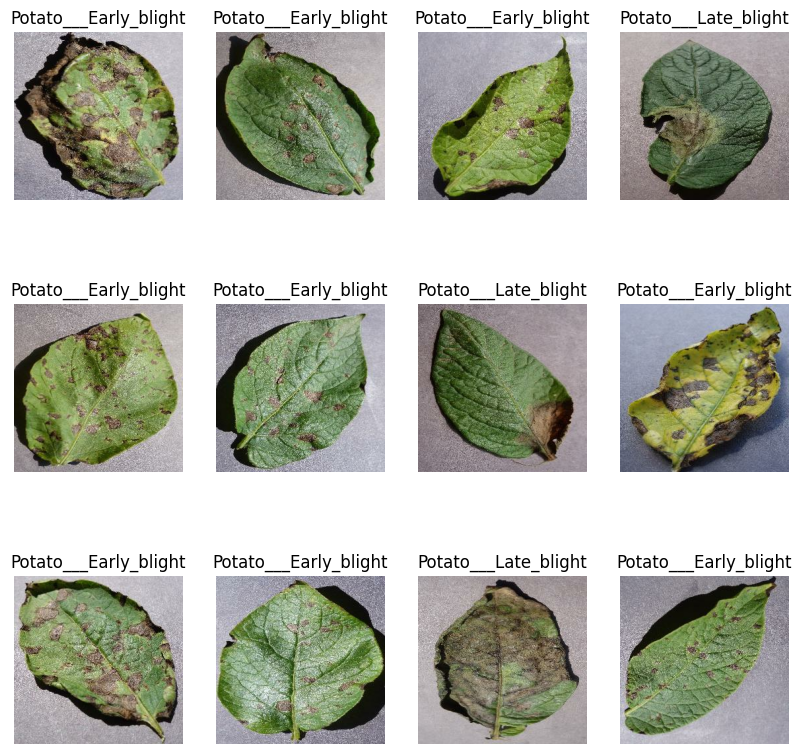

In [12]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [13]:
len(dataset)

68

In [14]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [15]:
train_ds = dataset.take(54)
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [17]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

model.build(input_shape = input_shape)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [30]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [31]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 242s 4s/step - loss: 0.8796 - accuracy: 0.5330 - val_loss: 0.7533 - val_accuracy: 0.6562
Epoch 2/50
54/54 [==============================] - 194s 4s/step - loss: 0.5819 - accuracy: 0.7367 - val_loss: 0.4334 - val_accuracy: 0.8125
Epoch 3/50
54/54 [==============================] - 179s 3s/step - loss: 0.3355 - accuracy: 0.8559 - val_loss: 0.1468 - val_accuracy: 0.9583
Epoch 4/50
54/54 [==============================] - 177s 3s/step - loss: 0.2430 - accuracy: 0.9080 - val_loss: 0.1199 - val_accuracy: 0.9531
Epoch 5/50
54/54 [==============================] - 181s 3s/step - loss: 0.2350 - accuracy: 0.9086 - val_loss: 0.1561 - val_accuracy: 0.9479
Epoch 6/50
54/54 [==============================] - 180s 3s/step - loss: 0.1596 - accuracy: 0.9392 - val_loss: 0.0811 - val_accuracy: 0.9740
Epoch 7/50
54/54 [==============================] - 177s 3s/step - loss: 0.1593 - accuracy: 0.9398 - val_loss: 0.1523 - val_accuracy: 0.9375
Epoch 8/50
54

In [33]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 11s 647ms/step - loss: 0.0308 - accuracy: 0.9844


In [34]:
scores

[0.030776450410485268, 0.984375]

In [35]:
history

In [36]:
history.params


{'verbose': 1, 'epochs': 50, 'steps': 54}

In [37]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
type(history.history['loss'])


list

In [39]:
len(history.history['loss'])


50

In [40]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.8796420097351074,
 0.5819329619407654,
 0.3355408012866974,
 0.24301061034202576,
 0.23498021066188812]

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


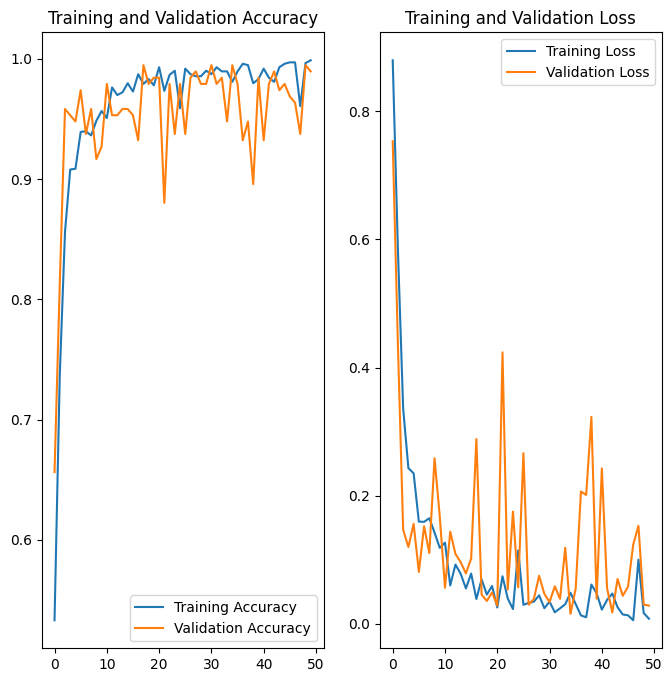

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 3s 3s/step
predicted label: Potato___Early_blight


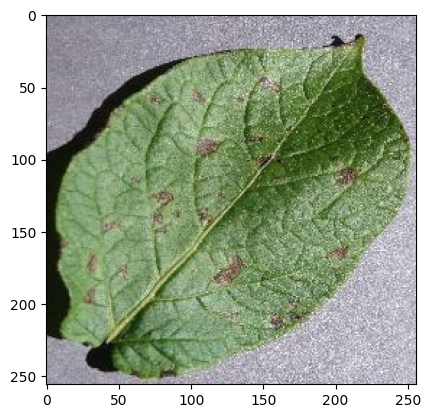

In [43]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 101ms/step


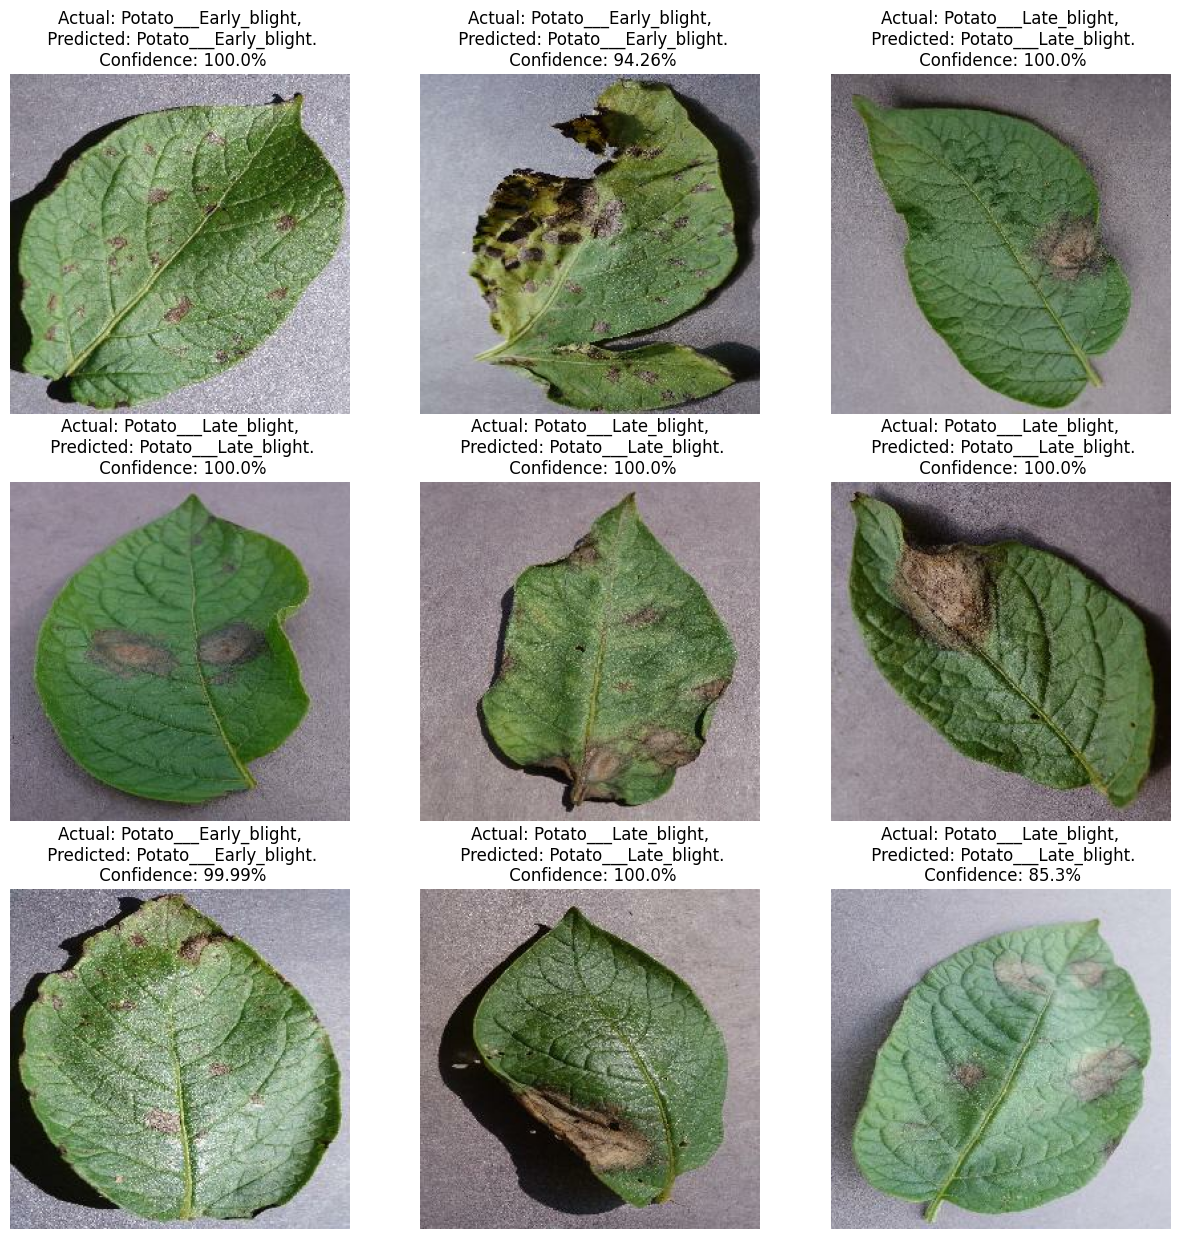

In [45]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [47]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [48]:
model.save("../potatoes.h5")